# **NETFLIX** **ANALYSIS** **USING** **PYTHON**

# **Objective**

  The notebook adopts a structured approach, starting from importing and cleaning data, to visualizing critical metrics using libraries like Matplotlib, Seaborn, and Pandas. Each section is dedicated to exploring specific dimensions of the dataset, helping to identify opportunities and challenges faced by Netflix in curating its content library.

The broader goal is to provide actionable insights for stakeholders, such as content creators, marketers, or strategists, to better understand Netflix's global content ecosystem. Additionally, this notebook serves as an educational resource for data enthusiasts aiming to learn how to handle and analyze real-world datasets using Python.

In [30]:
# Import necessary libraries
import os  # Provides functions for interacting with the operating system (e.g., file paths)
import pandas as pd  # Used for data manipulation and analysis with DataFrames
import numpy as np  # Provides numerical computing tools, including arrays and mathematical functions
import matplotlib.pyplot as plt  # Used for creating visualizations (plots, charts)
import seaborn as sns  # Built on top of matplotlib, provides a higher-level interface for statistical graphics

In [31]:
from google.colab import drive
drive.mount('/content/drive') # Removed the extra indentation

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import os
os.chdir("/content/drive/MyDrive/sanath netflix ") #the target directory path that you want to set as the new working directory.

In [33]:
os.getcwd()

'/content/drive/MyDrive/sanath netflix '

In [34]:
df = pd.read_csv('/content/drive/MyDrive/sanath netflix /netflix_movies (1).csv')

#**Exploratory Data Analysis (EDA)**

In [35]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [37]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [38]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [39]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [40]:
df.isnull().sum().sum()

4307

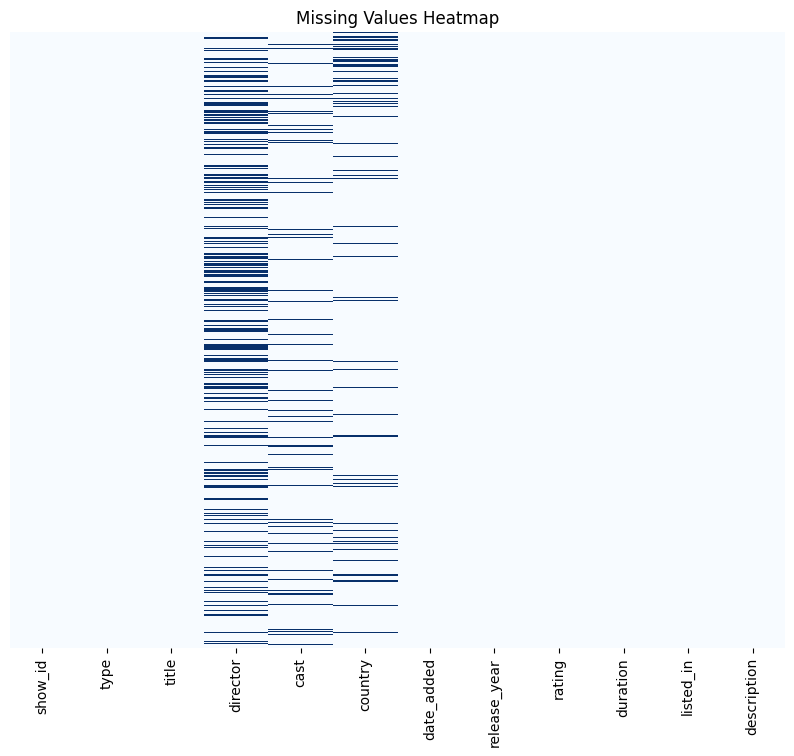

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="Blues", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [42]:
#Simple Imputation Method
df['director'].fillna(df['director'].mode()[0], inplace=True)                 # Fill 'director' column with its most frequent value
df['cast'].fillna(df['cast'].mode()[0], inplace=True)           # Fill 'cast' column with its most frequent value
df['country'].fillna(df['country'].mode()[0], inplace=True)             # Fill 'country' column with its most frequent value
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)                 # Fill 'date_added' column with its most frequent value
df['duration'].fillna(df['duration'].mode()[0], inplace=True)           # Fill 'duration' column with its most frequent value
df['rating'].fillna(df['rating'].mode()[0], inplace=True)             # Fill 'rating' column with its most frequent value


<ipython-input-42-76b25f4cccc0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna(df['director'].mode()[0], inplace=True)                 # Fill 'director' column with its most frequent value
<ipython-input-42-76b25f4cccc0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [43]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


# **Data Visualization**

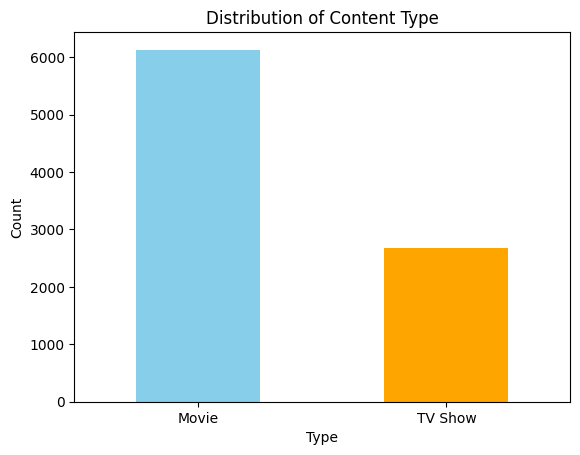

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
type_counts = df['type'].value_counts()

# Plot
type_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


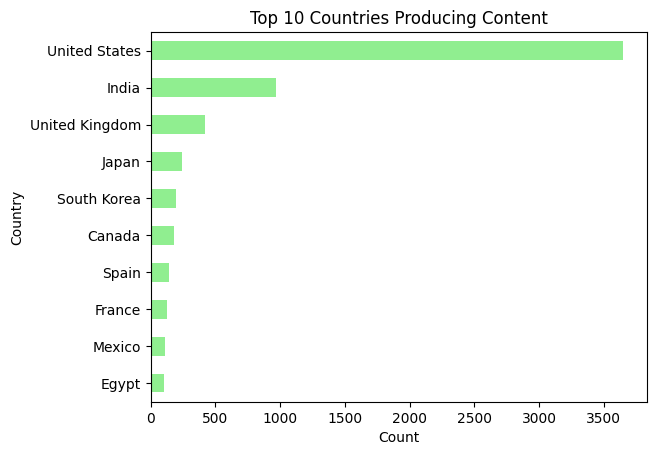

In [45]:
country_counts = df['country'].value_counts().head(10)

# Plot
country_counts.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Countries Producing Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.show()


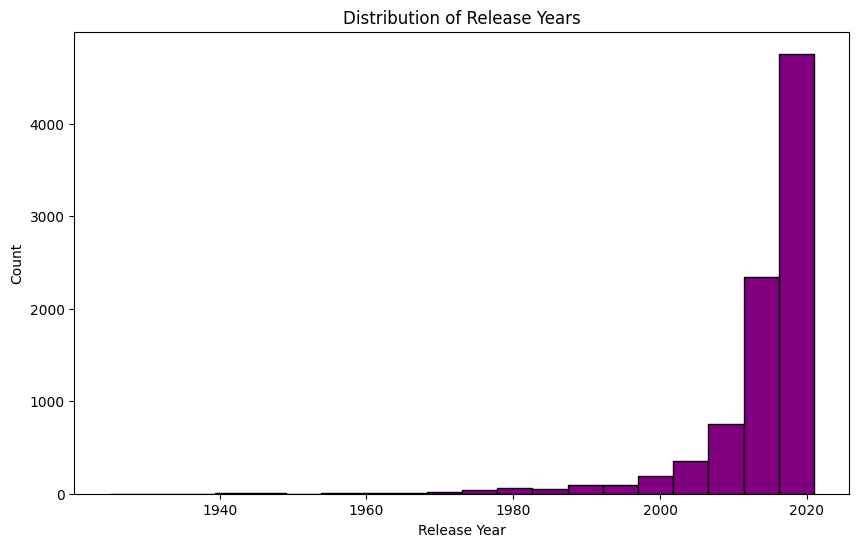

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(df['release_year'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


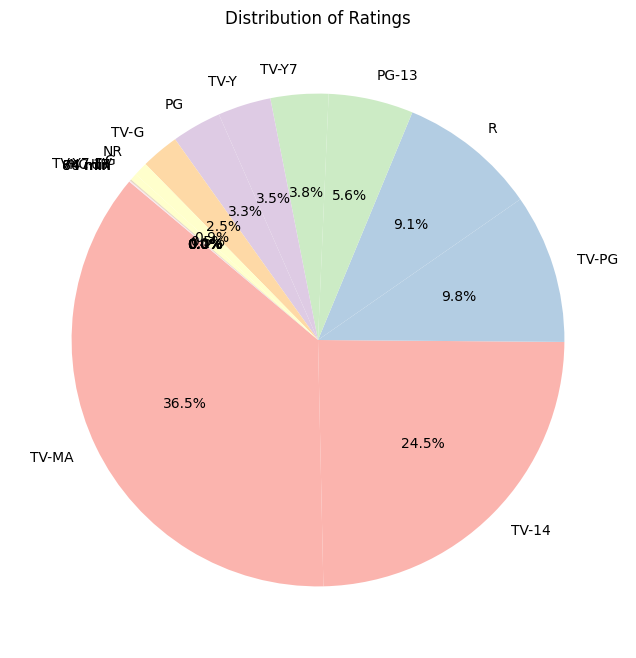

In [47]:
rating_counts = df['rating'].value_counts()

# Plot
rating_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140, colormap='Pastel1')
plt.title('Distribution of Ratings')
plt.ylabel('')  # Hides the y-label
plt.show()


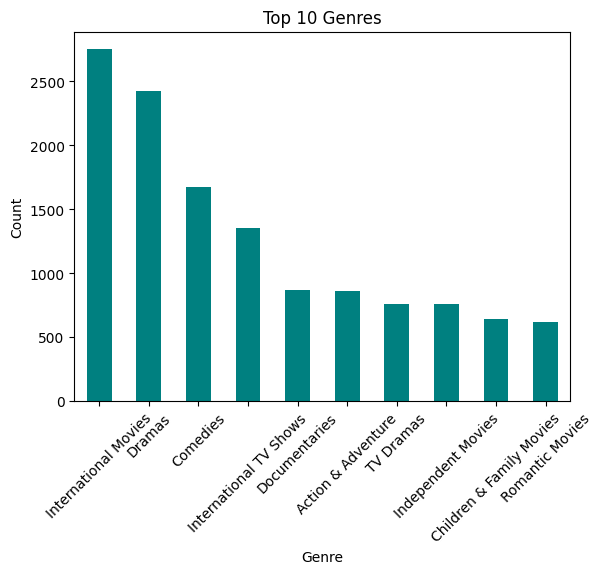

In [48]:
from collections import Counter

# Splitting the 'listed_in' column and counting each genre
all_genres = df['listed_in'].str.split(', ').sum()
genre_counts = pd.Series(Counter(all_genres)).sort_values(ascending=False).head(10)

# Plot
genre_counts.plot(kind='bar', color='teal')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


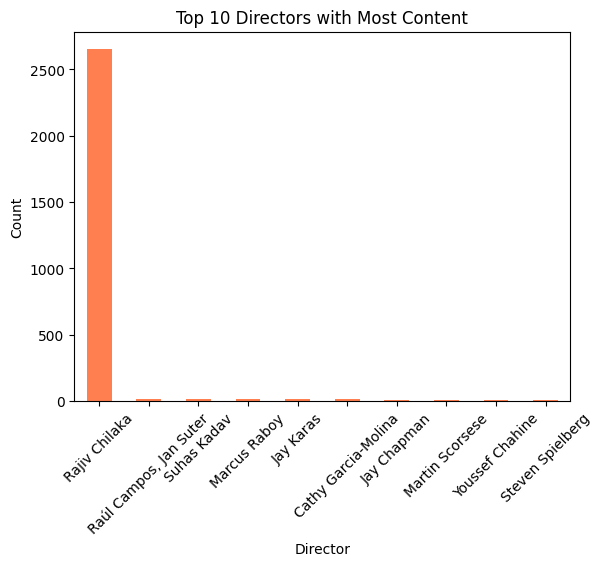

In [49]:
top_directors = df['director'].value_counts().head(10)

# Plot
top_directors.plot(kind='bar', color='coral')
plt.title('Top 10 Directors with Most Content')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [50]:
!pip install squarify
import squarify

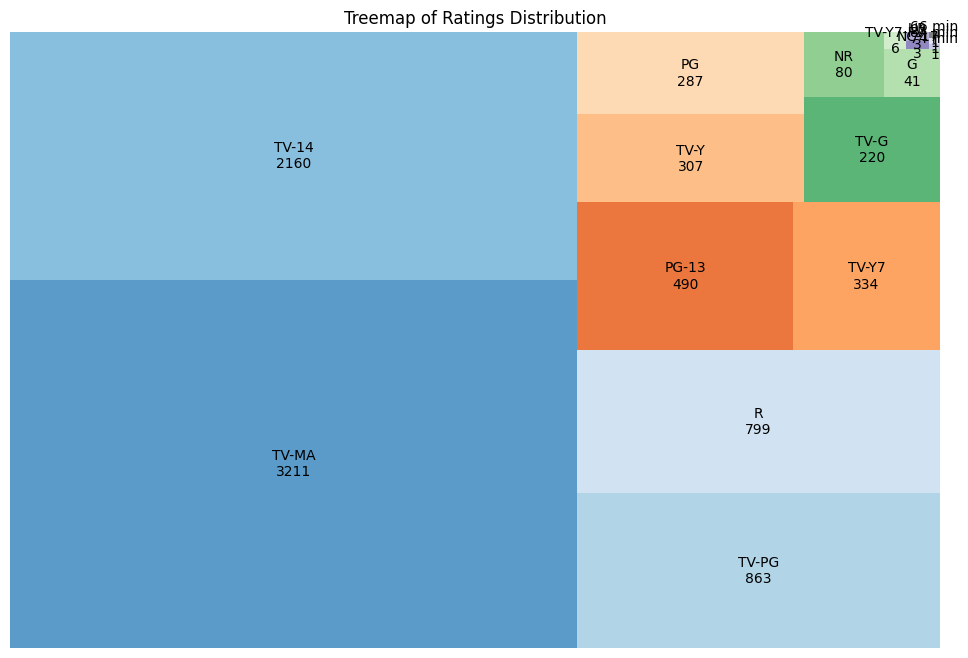

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Assuming df is your DataFrame
rating_counts = df['rating'].value_counts()

# Plot
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=rating_counts.values,
    label=[f'{label}\n{value}' for label, value in zip(rating_counts.index, rating_counts.values)],
    color=plt.cm.tab20c.colors,
    alpha=0.8
)
plt.title('Treemap of Ratings Distribution')
plt.axis('off')  # Hides axes
plt.show()


# **CONCLUSION**

The analysis of the Netflix dataset provided key insights into the platform's content trends. It highlighted the distribution of movies and TV shows, popular genres, and the evolution of content addition over the years. Ratings and country-specific data offered a glimpse into audience preferences and regional diversity. Visualizations, including treemaps and line graphs, effectively showcased these patterns, helping stakeholders understand the dynamics of Netflix's catalog for strategic decision-making.